# Análise exploratória inicial - Orders & Reviews Datasets

## Importando bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Leitura dos datasets

In [4]:
olist_orders = pd.read_csv('https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_orders_dataset.csv')
olist_order_reviews = pd.read_csv('https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_order_reviews_dataset.csv')

In [5]:
dfs = {
    'olist_order_reviews': olist_order_reviews,
    'olist_orders': olist_orders
}

In [6]:
# Checando shapes dos datasets (linhas, colunas)

for df_name, df in dfs.items():
    print(f'{df_name}: {df.shape}')

olist_order_reviews: (99224, 7)
olist_orders: (99441, 8)


## Orders Dataset

In [7]:
olist_orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# Informações gerais

olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
# Quantidade de pedidos nas categorias de status 

print(f'Os possíveis statuses dos pedidos são: {olist_orders["order_status"].unique()}')
print('\nA distribuição de pedidos de acordo com status é:')
olist_orders['order_status'].value_counts()

Os possíveis statuses dos pedidos são: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']

A distribuição de pedidos de acordo com status é:


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [10]:
# Checando nulos

olist_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Temos dados faltantes (NaN) nas colunas referentes às datas de aprovação do pagamento, de postagem do produto e de entrega ao cliente. Essa ausência pode estar relacionada ao status do pedido, uma vez que pedidos ainda não finalizados ou cancelados podem não ter essas informações.

In [11]:
# Checando valores percentuais de nulos para cada status de pedido

statuses = olist_orders['order_status'].unique()
cols_null = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

print('Porcentagem de dados nulos para cada status:')
print('-' * 50)

for column in cols_null: 
    print(f'{column}\n')
    col_null = olist_orders[column].isnull().sum()  
    for status in statuses:
        status_null = olist_orders.loc[olist_orders['order_status'] == status, column].isnull().sum()  
        percentage = (status_null / col_null) * 100 
        print(f'{status}: {percentage:.1f}%')
    print('-' * 50)

Porcentagem de dados nulos para cada status:
--------------------------------------------------
order_approved_at

delivered: 8.8%
invoiced: 0.0%
shipped: 0.0%
processing: 0.0%
unavailable: 0.0%
canceled: 88.1%
created: 3.1%
approved: 0.0%
--------------------------------------------------
order_delivered_carrier_date

delivered: 0.1%


invoiced: 17.6%
shipped: 0.0%
processing: 16.9%
unavailable: 34.2%
canceled: 30.8%
created: 0.3%
approved: 0.1%
--------------------------------------------------
order_delivered_customer_date

delivered: 0.3%
invoiced: 10.6%
shipped: 37.3%
processing: 10.2%
unavailable: 20.5%
canceled: 20.9%
created: 0.2%
approved: 0.1%
--------------------------------------------------


Analisando mais proximamente a distribuição de valores nulos de acordo com o status do pedido para cada coluna, vemos que, de fato, parece haver relação entre os dados faltantes e o status do pedido:

- `order_approved_at` (data de aprovação do pagamento): maior parte dos dados NaN foram referentes a pedidos cancelados (~88.1%);
- `order_delivered_carrier_date` (data de postagem do produto): maior parte dos dados NaN foram referentes a pedidos indisponíveis e cancelados (~65%), respectivamente;
- `order_delivered_customer_date` (data de entrega ao cliente): maior parte dos dados NaN foram referentes a pedidos enviados, cancelados e indisponíveis (~78.7%), respectivamente.

Pedidos entregues representaram menos de 0.3% de dados nulos em quase todas colunas, com exceção à "order_approved_at". Os dados faltantes nesse status levantam maiores questionamentos, uma vez que esses passaram por todos estágios de compra e transporte e deveriam conter todas informações. 

In [12]:
# Medidas estatísticas 

olist_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


## Reviews Dataset

In [13]:
olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [14]:
# Informações gerais

olist_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
# Quantidade de pedidos nas categorias de pontuação

print(f'As notas de avaliação possíveis dos pedidos são: {sorted(olist_order_reviews["review_score"].unique())}')
print('\nA distribuição de pedidos de acordo com nota de avaliação é:')
olist_order_reviews['review_score'].value_counts().sort_index(ascending=False)

As notas de avaliação possíveis dos pedidos são: [1, 2, 3, 4, 5]

A distribuição de pedidos de acordo com nota de avaliação é:


review_score
5    57328
4    19142
3     8179
2     3151
1    11424
Name: count, dtype: int64

In [16]:
# Checando nulos

olist_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Temos dados faltantes (NaN) nas colunas referentes ao título do comentário e mensagem do comentário, que quase sempre são opcionais, o que pode explicar sua ausência em algumas das avaliações de produtos.

In [17]:
# Medidas estatísticas 

olist_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Os valores encontrados acima indicam uma boa avaliação geral dos produtos, como evidenciado por:
- Média elevada de aproximadamente 4.09;
- Notas menores que 4 sendo representadas por somente 25% do total das avaliações;
- Mediana de 5, indicando que pelo menos metade das notas são iguais a 5.

Entretando, o desvio padrão de ~1.35 revela uma variação razoável entre as opiniões dos clientes sobre os produtos.

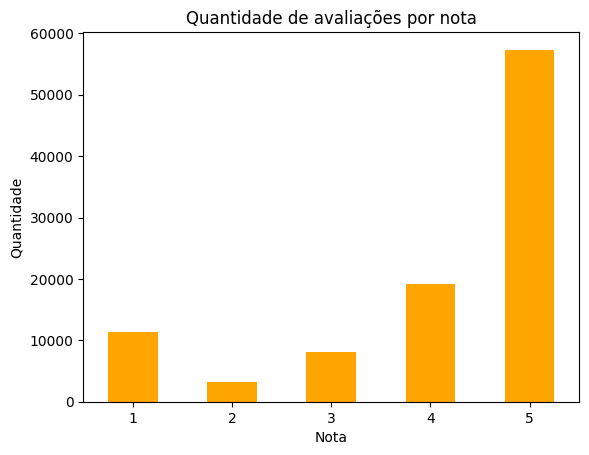

In [18]:
# Gráfico de qunatidade de avaliações por pontuação

score_count = olist_order_reviews['review_score'].value_counts().sort_index()

score_count.plot(kind='bar', xlabel='Nota', ylabel='Quantidade', title='Quantidade de avaliações por nota', color='orange', rot=0)

plt.show()